---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import numpy as np
import pandas as pd

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
path = '데이터/sbikedata.csv'
sbike = pd.read_csv(path)

In [3]:
sbike

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 
    대립가설 : 시간과 따릉이 대여량 간에는 연관성이 있다.

- 가설 3 :
    대립가설 : 온도와 따릉이 대여량 간에는 연관성이 있다

- 가설 4 :
    대립가설 : 습도와 따릉이 대여량 간에는 연관성이 있다

- 가설 5 :
    대립가설 : 미세먼지 수치와 따릉이 대여량 간에는 연관성이 있다

- 가설 6 :
    대립가설 : 시정에 따라 따릉이 대여량 간에 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

    시간

2. 변수가 수치형인지 범주형인지


In [4]:
#변수의 자료형을 확인해보세요.
sbike['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


    자료형은 int이지만 1시의 3배는 3시인가? 생각하면 아니라고 답할 수 있기 때문에
    범주형이다.

3. 변수의 결측치 존재 여부 및 조치방안

In [3]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

    non-null임 없음 ㅅㄱ

4. 변수의 기초 통계량 확인

In [5]:
#변수의 기초 통계량을 확인해보세요.
sbike['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

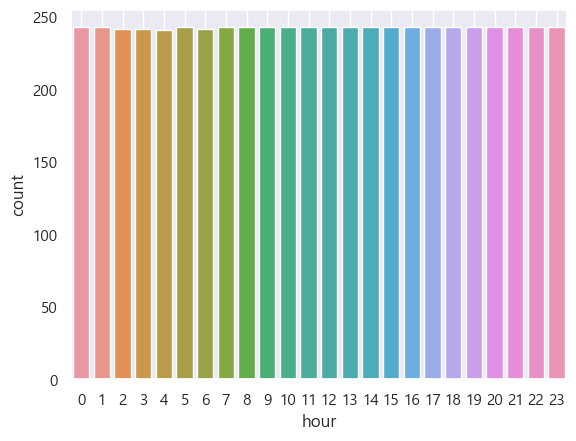

In [30]:
#변수의 분포를 확인해보세요.
sns.countplot(x = sbike['hour'])
plt.grid()
plt.show()

<AxesSubplot:xlabel='hour'>

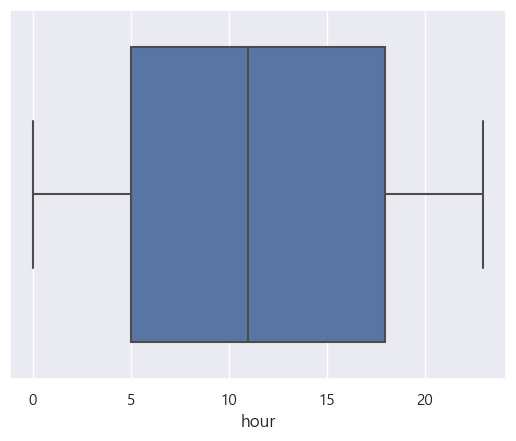

In [88]:
sns.boxplot(x = sbike['hour'])


<AxesSubplot:xlabel='hour', ylabel='count'>

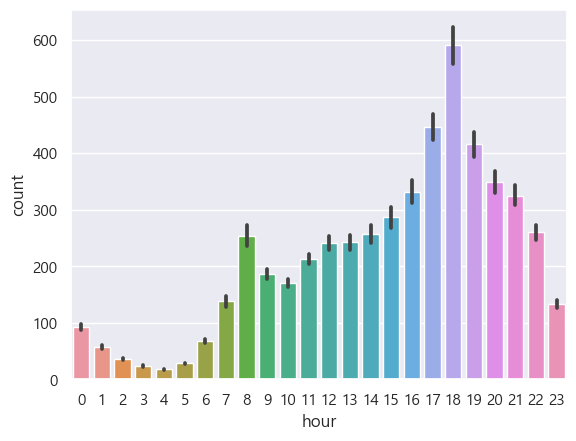

In [31]:
sns.barplot(x = 'hour', y = 'count', data = sbike)

<AxesSubplot:xlabel='hour', ylabel='count'>

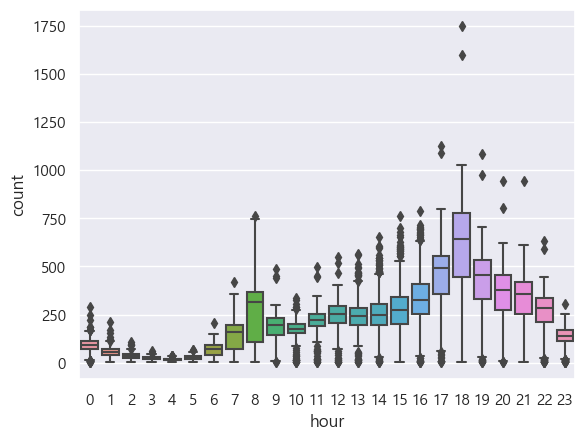

In [87]:
sns.boxplot(x = 'hour', y = 'count', data = sbike)


6. 위 정보로 부터 파악한 내용 정리

In [5]:
#위 정보로부터 파악하신 내용을 정리해보세요.

시간대별 이용수인 줄 알았는데 그냥 시간대이고을 의미하는 거였고 18:00~18:59분 이용객이 가장 많고 4:00~4:59분 사용자가 가장 적다.

7. 추가 분석사항 도출

In [7]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

시간을 수치형으로 사용할 수 있는 방법이 있을까?
이변량 분석할 때 hour를 어떻게 써야 하지

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

온도

In [10]:
sbike['temperature'].head()

0    13.1
1    12.4
2    13.1
3    13.0
4    13.0
Name: temperature, dtype: float64

2. 변수가 수치형인지 범주형인지


In [11]:
#변수의 자료형을 확인해보세요.
sbike['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [2]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

    없음

4. 변수의 기초 통계량 확인

In [12]:
#변수의 기초 통계량을 확인해보세요
sbike['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

In [18]:
sbike.head(5)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


5. 변수의 분포 확인

<AxesSubplot:xlabel='temperature', ylabel='count'>

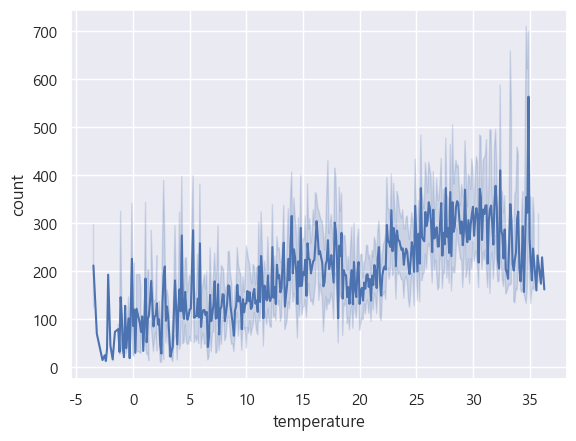

In [25]:
#변수의 분포를 확인해보세요.
sns.lineplot(x = 'temperature', y = 'count', data = sbike)

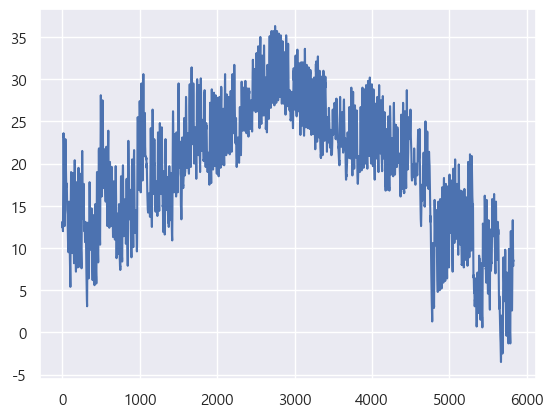

In [26]:
plt.plot('temperature', data = sbike)

In [35]:
sbike.corr()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
hour,1.000000,0.044216,0.049832,0.226092,0.190606,-0.000085,0.220301,-0.304287,0.088881,0.586435
PM10,0.044216,1.000000,0.684193,0.008393,-0.127034,-0.095161,0.043421,-0.088692,-0.289495,0.028282
PM2.5,0.049832,0.684193,1.000000,0.053838,-0.110659,-0.133784,-0.136576,-0.035074,-0.433992,0.037130
ozone,0.226092,0.008393,0.053838,1.000000,0.532444,-0.078719,0.349024,-0.404614,0.138263,0.316083
temperature,0.190606,-0.127034,-0.110659,0.532444,1.000000,-0.040205,0.051311,-0.092162,0.143919,0.277169
precipitation,-0.000085,-0.095161,-0.133784,-0.078719,-0.040205,1.000000,0.045742,0.384594,-0.494057,-0.269859
windspeed,0.220301,0.043421,-0.136576,0.349024,0.051311,0.045742,1.000000,-0.292127,0.084418,0.223722
humidity,-0.304287,-0.088692,-0.035074,-0.404614,-0.092162,0.384594,-0.292127,1.000000,-0.487472,-0.478955
visibility,0.088881,-0.289495,-0.433992,0.138263,0.143919,-0.494057,0.084418,-0.487472,1.000000,0.265828
count,0.586435,0.028282,0.037130,0.316083,0.277169,-0.269859,0.223722,-0.478955,0.265828,1.000000


In [79]:
spst.pearsonr(sbike['temperature'], sbike['count'])

PearsonRResult(statistic=0.27416222788541533, pvalue=2.585011313554534e-98)

## 온도 같은 경우는 같은 온도끼리 count 다 더하기

In [80]:
# 데이터 타입에 주의하여 이변량 분석을 해보세요
sbike_data = sbike.groupby('temperature', as_index = False)['count'].sum()

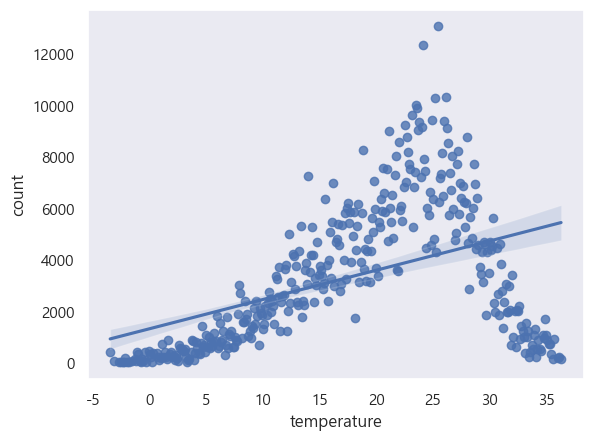

In [81]:
# 데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x = 'temperature', y = 'count', data = sbike_data)
plt.grid()
plt.show()

In [82]:
sbike_data_cold = sbike_data.loc[sbike_data['temperature'] <= 25]
sbike_data_hot = sbike_data.loc[sbike_data['temperature'] > 25]

### 더울수룩 나가기 싫음

<AxesSubplot:xlabel='temperature', ylabel='count'>

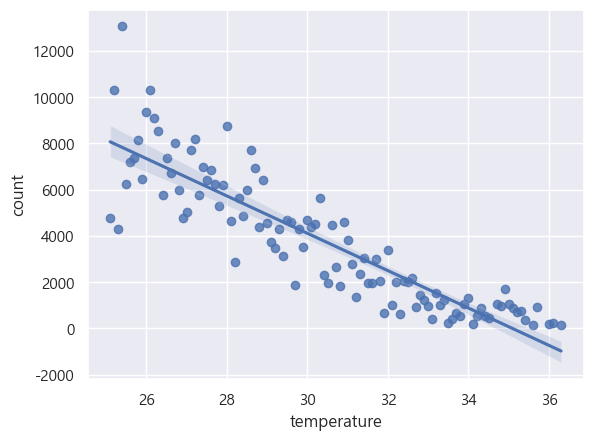

In [85]:
sns.regplot(x = 'temperature', y = 'count', data = sbike_data_hot)

### 추울수록 나가기 싫음

<AxesSubplot:xlabel='temperature', ylabel='count'>

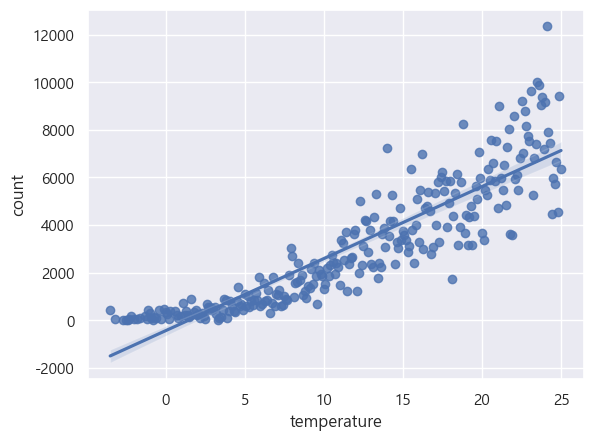

In [86]:
sns.regplot(x = 'temperature', y = 'count', data = sbike_data_cold)


6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    온도가 35도 이상일 때 대여량이 가장 높고
    온도가 0도 이하 즉, 영하로 떨어질 때 대여량이 가장 낮다

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

강우 여부, 비가 오면 1 오지 않으면 0

2. 변수가 수치형인지 범주형인지


In [27]:
#변수의 자료형을 확인해보세요.
sbike['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


범주형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없다.

4. 변수의 기초 통계량 확인

In [28]:
#변수의 기초 통계량을 확인해보세요
sbike['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='precipitation', ylabel='count'>

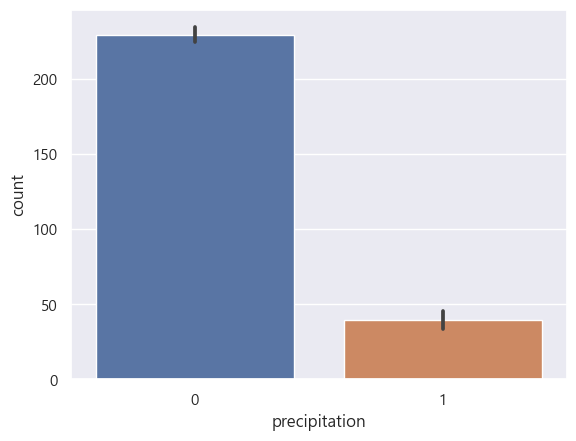

In [32]:
#변수의 분포를 확인해보세요.
sns.barplot(x='precipitation', y = 'count', data = sbike)

<AxesSubplot:xlabel='precipitation', ylabel='count'>

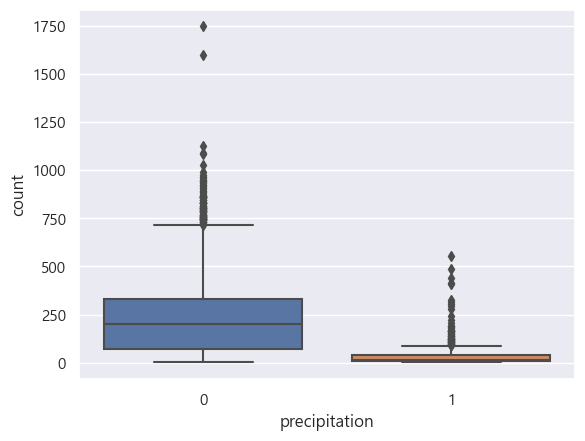

In [34]:
sns.boxplot(x = 'precipitation', y = 'count', data = sbike)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    비가 오면 1 오지 않으면 0인데 오지 않았을 때 사용량이 월등하게 높고, 비가 올 때 사용량이 있긴 하지만 오지 않을 때보단 월등히 낮다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

    비가 왔을 때 사용하는 고객은 어떤 사유로 비가 오는데도 불구하고 이용할 수밖에 없었는지, 왔다면 얼마나 왔는지도 분석해 보고싶다.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

풍속(평균)

2. 변수가 수치형인지 범주형인지


In [36]:
#변수의 자료형을 확인해보세요.
sbike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [39]:
sbike['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없음

4. 변수의 기초 통계량 확인

In [38]:
#변수의 기초 통계량을 확인해보세요
sbike['windspeed'].describe()


count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='windspeed', ylabel='count'>

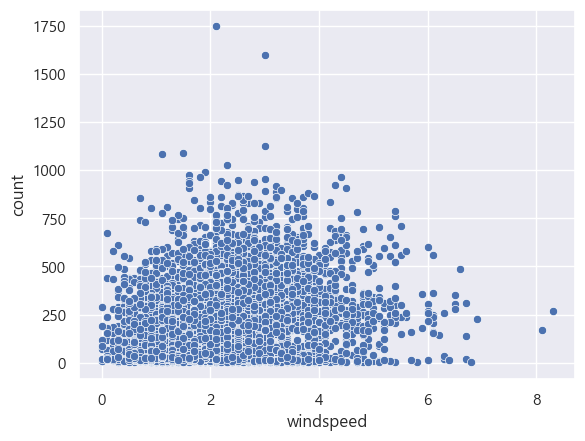

In [42]:
sns.scatterplot(x = 'windspeed', y = 'count', data = sbike)


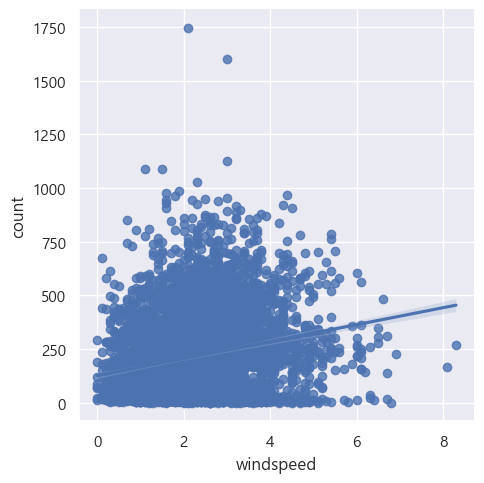

In [41]:
#변수의 분포를 확인해보세요.
sns.lmplot(x = 'windspeed', y = 'count', data = sbike)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    바람이 어느 정도(2~4) 있을 때 사용량이 가장 높다? 

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    습도

2. 변수가 수치형인지 범주형인지


In [43]:
#변수의 자료형을 확인해보세요.
sbike['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없음

4. 변수의 기초 통계량 확인

In [44]:
#변수의 기초 통계량을 확인해보세요
sbike['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='humidity', ylabel='count'>

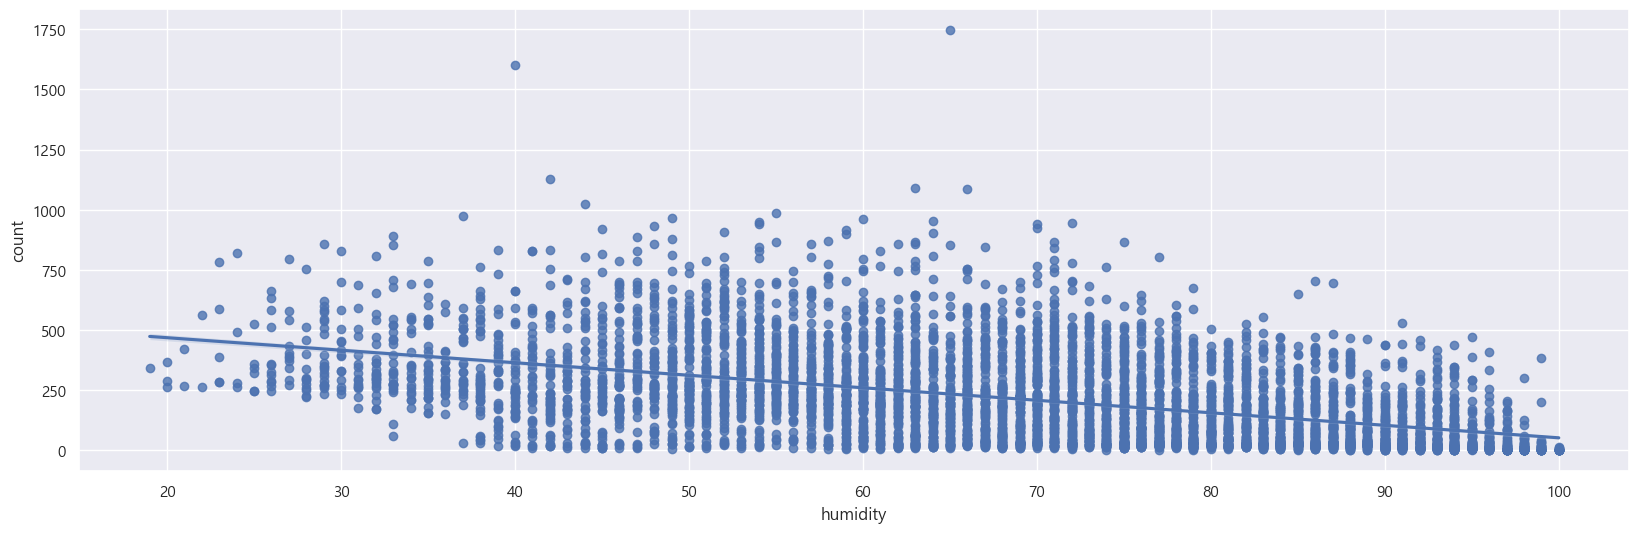

In [77]:
#변수의 분포를 확인해보세요.
plt.figure(figsize=(20, 6))
sns.regplot(x = 'humidity', y = 'count', data = sbike)

In [78]:
spst.pearsonr(sbike['humidity'], sbike['count'])

PearsonRResult(statistic=-0.48074217482491177, pvalue=0.0)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    습도가 높아질수록 이용량이 증가한다.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

    습도가 높아질수록 이용량이 증가하는데, 이게 모순이라고 생각하는 점은 분명 강우 여부에 따라 이용량 차이가 많이 났었는데 장마 기간 동안 최고 습도가 96%에 임박하며 습도가 높다 = 비가 오거나, 비 때문에 바닥이 축축하다로 해석이 된다. 그런데 이용량이 높아진다? 더 분석해질 필요가 있어 보인다.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    시정, 시계 => 안개가 끼는 날은 사용량이 줄어들고 그런...

2. 변수가 수치형인지 범주형인지


In [46]:
#변수의 자료형을 확인해보세요.
sbike.tail()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125
5826,2021-11-30,0,39.0,31.0,0.004,7.9,0,2.3,71,1483,95


In [51]:
sbike['visibility'].unique()

array([2000,  521,  206, ..., 1193, 1233, 1250], dtype=int64)

    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [52]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
sbike['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [53]:
#변수의 기초 통계량을 확인해보세요
sbike['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

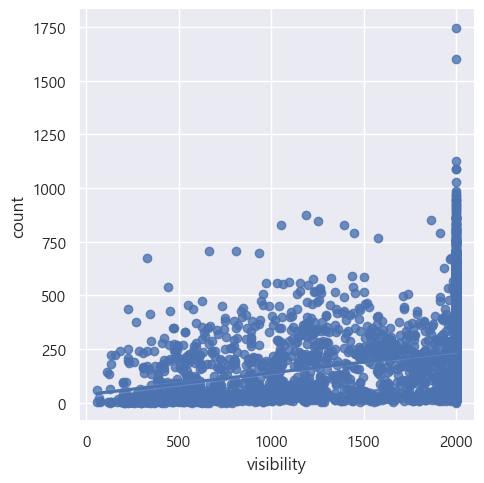

In [54]:
#변수의 분포를 확인해보세요.
sns.lmplot(x = 'visibility', y = 'count', data = sbike )

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    2000에 많은 데이터들이 분포하고 있다. 뭐를 의미할까?

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    오존 수치

2. 변수가 수치형인지 범주형인지


In [55]:
#변수의 자료형을 확인해보세요.
sbike['ozone'].unique()

array([0.002, 0.003, 0.023, 0.028, 0.008, 0.009, 0.018, 0.027, 0.032,
       0.033, 0.038, 0.042, 0.044, 0.045, 0.043, 0.039, 0.037, 0.036,
       0.034, 0.04 , 0.035, 0.041, 0.025, 0.01 , 0.015, 0.006, 0.022,
       0.019, 0.03 , 0.026, 0.021, 0.017, 0.031, 0.029, 0.024, 0.02 ,
       0.016, 0.004, 0.049, 0.053, 0.055, 0.059, 0.06 , 0.051, 0.046,
       0.012, 0.013, 0.014, 0.047, 0.05 , 0.058, 0.052, 0.007, 0.056,
         nan, 0.066, 0.057, 0.011, 0.054, 0.065, 0.067, 0.07 , 0.077,
       0.072, 0.005, 0.064, 0.068, 0.071, 0.061, 0.074, 0.069, 0.048,
       0.063, 0.079, 0.106, 0.104, 0.085, 0.075, 0.081, 0.073, 0.08 ,
       0.062, 0.078, 0.088, 0.107, 0.11 , 0.116, 0.087, 0.082, 0.097,
       0.099, 0.094, 0.086, 0.083, 0.09 , 0.093, 0.084, 0.076, 0.089,
       0.1  , 0.137, 0.115, 0.092, 0.098, 0.103, 0.096, 0.111, 0.118,
       0.101, 0.001])

In [56]:
sbike['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [59]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요.
sbike['ozone'].dropna()

0       0.002
1       0.003
2       0.023
3       0.028
4       0.008
        ...  
5822    0.002
5823    0.002
5824    0.002
5825    0.001
5826    0.004
Name: ozone, Length: 5699, dtype: float64

In [60]:
sbike['ozone'].unique()

array([0.002, 0.003, 0.023, 0.028, 0.008, 0.009, 0.018, 0.027, 0.032,
       0.033, 0.038, 0.042, 0.044, 0.045, 0.043, 0.039, 0.037, 0.036,
       0.034, 0.04 , 0.035, 0.041, 0.025, 0.01 , 0.015, 0.006, 0.022,
       0.019, 0.03 , 0.026, 0.021, 0.017, 0.031, 0.029, 0.024, 0.02 ,
       0.016, 0.004, 0.049, 0.053, 0.055, 0.059, 0.06 , 0.051, 0.046,
       0.012, 0.013, 0.014, 0.047, 0.05 , 0.058, 0.052, 0.007, 0.056,
         nan, 0.066, 0.057, 0.011, 0.054, 0.065, 0.067, 0.07 , 0.077,
       0.072, 0.005, 0.064, 0.068, 0.071, 0.061, 0.074, 0.069, 0.048,
       0.063, 0.079, 0.106, 0.104, 0.085, 0.075, 0.081, 0.073, 0.08 ,
       0.062, 0.078, 0.088, 0.107, 0.11 , 0.116, 0.087, 0.082, 0.097,
       0.099, 0.094, 0.086, 0.083, 0.09 , 0.093, 0.084, 0.076, 0.089,
       0.1  , 0.137, 0.115, 0.092, 0.098, 0.103, 0.096, 0.111, 0.118,
       0.101, 0.001])

In [61]:
sbike['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


있음 nan

In [62]:
#na를 제거하는 함수
def naclear(data, na = 'nan'): #데이터프레임, na문자열
    if na != 'nan': #특수한 문자열로 결측치 표시가 되어있는 경우
        for val in data.columns: #모든 값에 대해
            print(val)
            data = data.loc[data[val]!= na]
    data.dropna(inplace = True)
    return data

In [63]:
naclear(sbike)

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30
...,...,...,...,...,...,...,...,...,...,...,...
5822,2021-11-29,20,74.0,58.0,0.002,9.3,0,0.3,66,1193,273
5823,2021-11-29,21,65.0,56.0,0.002,8.4,0,2.0,70,1233,228
5824,2021-11-29,22,51.0,41.0,0.002,8.6,0,1.9,70,1250,215
5825,2021-11-29,23,43.0,35.0,0.001,8.2,0,2.1,71,1262,125


In [64]:
sbike['ozone'].unique()

array([0.002, 0.003, 0.023, 0.028, 0.008, 0.009, 0.018, 0.027, 0.032,
       0.033, 0.038, 0.042, 0.044, 0.045, 0.043, 0.039, 0.037, 0.036,
       0.034, 0.04 , 0.035, 0.041, 0.025, 0.01 , 0.015, 0.006, 0.022,
       0.019, 0.03 , 0.026, 0.021, 0.017, 0.031, 0.029, 0.024, 0.02 ,
       0.016, 0.004, 0.049, 0.053, 0.055, 0.059, 0.06 , 0.051, 0.046,
       0.012, 0.013, 0.014, 0.047, 0.05 , 0.058, 0.052, 0.007, 0.056,
       0.066, 0.057, 0.011, 0.054, 0.065, 0.067, 0.07 , 0.077, 0.072,
       0.005, 0.064, 0.068, 0.071, 0.061, 0.074, 0.069, 0.048, 0.063,
       0.079, 0.106, 0.104, 0.085, 0.075, 0.081, 0.073, 0.08 , 0.062,
       0.078, 0.088, 0.107, 0.11 , 0.116, 0.087, 0.082, 0.097, 0.099,
       0.094, 0.086, 0.083, 0.09 , 0.093, 0.084, 0.076, 0.089, 0.1  ,
       0.137, 0.115, 0.092, 0.098, 0.103, 0.096, 0.111, 0.118, 0.101,
       0.001])

In [66]:
sbike['ozone'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5670 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5670 non-null   float64
dtypes: float64(1)
memory usage: 88.6 KB


4. 변수의 기초 통계량 확인

In [67]:
#변수의 기초 통계량을 확인해보세요
sbike['ozone'].describe()

count    5670.000000
mean        0.031793
std         0.018250
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

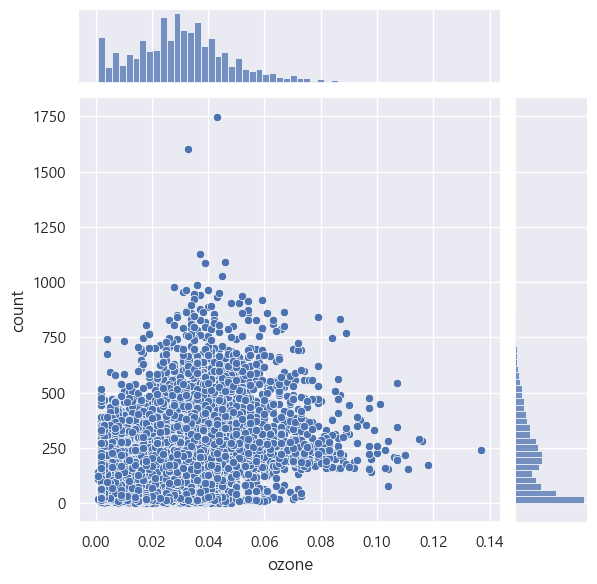

In [70]:
#변수의 분포를 확인해보세요.
sns.jointplot(x = 'ozone', y = 'count', data = sbike)

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

    오존 농도가 높아질수록 이용량이 줄어든다. 빈도수조차...

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

    미세먼지 수치

2. 변수가 수치형인지 범주형인지


In [71]:
#변수의 자료형을 확인해보세요.
sbike['PM10'].unique()

array([ 42.,  41.,  30.,  27.,  29.,  31.,  39.,  35.,  34.,  40.,  37.,
        43.,  46.,  50.,  51.,  44.,  48.,  49.,  45.,  38.,  36.,  54.,
        58.,  56.,  61.,  47.,  20.,  17.,  12.,  10.,   7.,   9.,   3.,
         6.,   8.,  13.,  15.,  23.,  26.,  22.,  21.,  19.,  24.,  28.,
        25.,  57.,  67.,  69.,  68.,  77.,  75.,  79.,  64.,  33.,  32.,
        52.,  14.,   5.,   4.,  16.,  18.,  62., 123., 269., 296., 119.,
        66.,  74.,  86.,  98.,  97., 100.,  96., 104.,  88.,  85.,  87.,
        90.,  99., 129., 147., 130., 126., 103.,  70.,  55.,  11.,  53.,
        59.,  72.,  81.,  89.,  73.,  60.,  65.,  71.,  78.,  83.,  84.,
        92.,  80.,  76.,  63.,  82., 151., 309., 485., 562., 555., 563.,
       594., 606., 586., 568., 706., 799., 817., 827., 726., 615., 590.,
       582., 551., 484., 483., 479., 433., 373., 332., 293., 222., 230.,
       250., 261., 262., 248., 263., 251., 231., 175.,  93., 152., 110.,
       167., 228., 254., 271., 244., 236., 216., 21

In [72]:
sbike['PM10'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5670 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5670 non-null   float64
dtypes: float64(1)
memory usage: 217.6 KB


    수치형

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

없음

4. 변수의 기초 통계량 확인

In [73]:
#변수의 기초 통계량을 확인해보세요
sbike['PM10'].describe()

count    5670.000000
mean       31.580423
std        42.811991
min         3.000000
25%        16.000000
50%        24.500000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [ ]:
#변수의 자료형을 확인해보세요.

3. 변수의 결측치 존재 여부 및 조치방안

In [ ]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 

4. 변수의 기초 통계량 확인

In [ ]:
#변수의 기초 통계량을 확인해보세요

5. 변수의 분포 확인

In [ ]:
#변수의 분포를 확인해보세요.

6. 위 정보로 부터 파악한 내용 정리

In [ ]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [ ]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

In [9]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [89]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

#0~6, 7~12, 13~18, 19~23
sbike['시간대'] = pd.cut(sbike['hour'], bins = [0, 6, 12, 18, 23], labels=['새벽', '오전', '오후', '밤'])

In [90]:
sbike.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,시간대
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,새벽
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,새벽
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,새벽
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,새벽
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,새벽


In [92]:
dawn = sbike.loc[sbike['시간대'] == '새벽', 'count']
morning = sbike.loc[sbike['시간대'] == '오전', 'count']
afternoon = sbike.loc[sbike['시간대'] == '오후', 'count']
night = sbike.loc[sbike['시간대'] == '밤', 'count']

In [93]:
spst.f_oneway(dawn, morning, afternoon, night)

F_onewayResult(statistic=1370.836232126468, pvalue=0.0)

<AxesSubplot:xlabel='시간대', ylabel='count'>

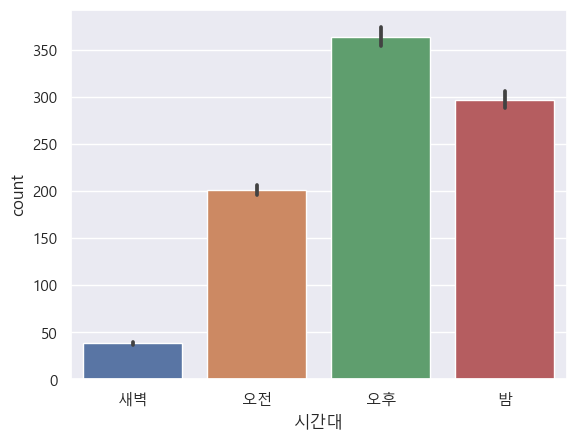

In [94]:
sns.barplot(x = '시간대', y = 'count', data = sbike)

3. 온도 데이터와 따릉이 대여량간 분석

In [11]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

In [101]:
# 피어슨 상관관계
spst.pearsonr(sbike['temperature'], sbike['count'])

PearsonRResult(statistic=0.27416222788541533, pvalue=2.585011313554534e-98)

In [96]:
sbike['temp2'] = pd.cut(sbike['temperature'], bins = [sbike['temperature'].min(), 5, 15, 25, sbike['temperature'].max()], labels=['cold', 'cool', 'warm', 'hot'])

In [97]:
cold = sbike.loc[sbike['temp2'] == 'cold', 'count']
cool = sbike.loc[sbike['temp2'] == 'cool', 'count']
warm = sbike.loc[sbike['temp2'] == 'warm', 'count']
hot = sbike.loc[sbike['temp2'] == 'hot', 'count']

In [100]:
# 분산분석 ANOVA
spst.f_oneway(cold, cool, warm, hot) 

F_onewayResult(statistic=152.38001476433692, pvalue=5.6496949562008624e-95)

<AxesSubplot:xlabel='temp2', ylabel='count'>

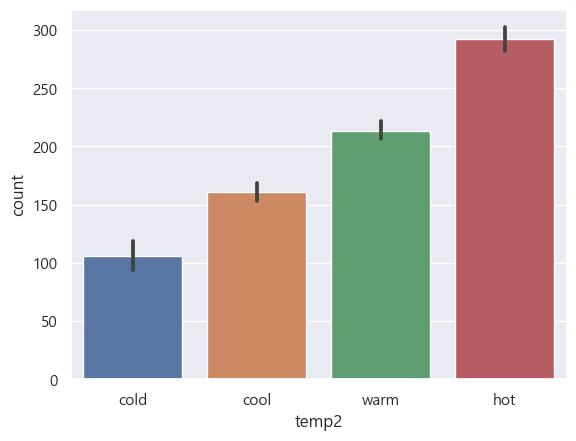

In [99]:
sns.barplot(x = 'temp2', y = 'count', data = sbike)

4. 풍속 데이터와 따릉이 대여량간 분석

In [12]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

5. 습도 데이터와 따릉이 대여량간 분석

In [13]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

6. 시정 데이터와 따릉이 대여량간 분석

In [14]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

7. 오존 데이터와 따릉이 대여량간 분석

In [15]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

In [16]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

In [17]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

온도, 습도, 강수량, 시간

#### <font color='green'>2. 약한 관계의 변수</font>


미세먼지 수치, 초미세먼지 수치

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


오존 수치?

### [Step6] Insight 도출

- 온도, 습도, 불쾌지수가 높아질수록 따릉이 이용량이 증가하는 경향이 확인되었고 이는 날씨가 너워지면서 도보이용보다 따릉이를 이용한 이동시간 감축에 대한 선호도가 높아짐으로 인한 현상으로 보인다.
- 반대로 춥고 불쾌지수가 낮은 경우에는 따릉이를 타지 않음 > 손 시림
  - 따라서 "온, 습도가 높은 날에는 더 많은 따릉이를 배치"한다는 것을 솔루션으로 제시한다.

- 시간대별 분석결과 12~18시, 18~24시에 수요량이 증가한다.
- 사유는 퇴근시간에 이용고객 증가로 인한 현상으로 보인다.
  - 따라서 "12~18시, 18~24시에 따릉이를 많이 배치"한다는 것을 솔루션으로 제시한다.